# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd


# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [7]:
#(Rows, columns)
df_apps.shape

(10841, 12)

In [9]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [29]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2150,Ek Do Teen Song Videos - Baaghi 2 Video Songs,FAMILY,NaN,2,4.50,"1,000",Free,0,Everyone,Entertainment,"March 20, 2018",4.0.3 and up
3433,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.70,158,11.00,"10,000",Free,0,Everyone,Art & Design,"November 29, 2017",4.0.3 and up
5790,Meme Generator,ENTERTAINMENT,4.60,3771,53.00,"100,000",Paid,$2.99,Mature 17+,Entertainment,"August 3, 2018",4.1 and up
2955,O-Star,DATING,4.40,59,38.00,"5,000",Free,0,Everyone,Dating,"July 19, 2018",4.3 and up
1676,DF Wall Plus – Droid Firewall,TOOLS,NaN,9,6.30,500,Free,0,Everyone,Tools,"August 20, 2017",4.0.3 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [33]:
df_apps= df_apps.drop(["Last_Updated", "Android_Ver"], axis=1)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [39]:
df_apps.isna()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False


In [42]:
#rows with nan rating
nan = df_apps[df_apps.Rating.isna()]

In [317]:
#droping the nan rows
df_apps_clean= df_apps.dropna()

In [318]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.50,27723193,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.50,27724094,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [319]:
#checking duplicates
x =df_apps_clean.duplicated()

In [320]:
x

21       False
28       False
47       False
82       False
99       False
         ...  
10836    False
10837    False
10838    False
10839     True
10840    False
Length: 9367, dtype: bool

In [321]:
df_apps_clean[x]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...,...
10802,Skype - free IM & video calls,COMMUNICATION,4.10,10484169,3.50,"1,000,000,000",Free,0,Everyone,Communication
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10826,Google Drive,PRODUCTIVITY,4.40,2731211,4.00,"1,000,000,000",Free,0,Everyone,Productivity
10832,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines


In [322]:
#finding instagram entries
df_apps_clean[df_apps_clean["App"]=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [323]:
#droping the duplicates
df_apps_clean = df_apps_clean.drop_duplicates()

In [324]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [325]:
df_apps_clean = df_apps_clean.drop_duplicates("App")

In [326]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [327]:
df_apps_clean.App[df_apps_clean.Rating.idxmax()]

'KBA-EZ Health Guide'

In [328]:
df_apps_clean.sort_values("Rating", ascending= False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography
...,...,...,...,...,...,...,...,...,...,...
1721,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.00,3,41.00,500,Free,0,Everyone,Tools
728,Truck Driving Test Class 3 BC,FAMILY,1.00,1,2.00,50,Paid,$1.49,Everyone,Education
240,House party - live chat,DATING,1.00,1,9.20,10,Free,0,Mature 17+,Dating
1271,MbH BM,MEDICAL,1.00,1,2.30,100,Free,0,Everyone,Medical


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [329]:
df_apps_clean.sort_values("Size_MBs", ascending= False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [330]:
df_apps_clean.sort_values("Reviews", ascending= False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [331]:
#Charts based on the Content Ratings

In [332]:
con_rating = df_apps_clean.Content_Rating.value_counts()

In [333]:
con_rating

Everyone           6619
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [334]:
import matplotlib.pyplot as mpl
import plotly.express as pex

In [335]:
#Pie
pie = pex.pie(labels=con_rating.index, values=con_rating.values, title="Content Rating", names=con_rating.index)
pie.update_traces(textposition="outside", textinfo="percent+label")
pie.show()

C:\Users\yaswa\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [336]:
#Donut
donut = pex.pie(labels=con_rating.index, values=con_rating.values, title="Content Rating", hole=.5, names= con_rating.index)
donut.update_traces(textposition="outside", textinfo="percent+label")
donut.show()

C:\Users\yaswa\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [337]:
type(df_apps_clean.Installs)

pandas.core.series.Series

In [338]:
df_apps_clean.Installs.describe()

count          8197
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [339]:
df_apps_clean.Installs.info()

<class 'pandas.core.series.Series'>
Int64Index: 8197 entries, 21 to 10835
Series name: Installs
Non-Null Count  Dtype 
--------------  ----- 
8197 non-null   object
dtypes: object(1)
memory usage: 386.1+ KB


In [340]:
df_apps_clean.Installs.astype(str).str.replace(",","")

21                1
28                1
47                1
82                5
99                5
            ...    
10824    1000000000
10828    1000000000
10829    1000000000
10831    1000000000
10835    1000000000
Name: Installs, Length: 8197, dtype: object

In [341]:
df_apps_clean.Installs= df_apps_clean.Installs.astype(str).str.replace(",","")

In [342]:
df_apps_clean.Installs= pd.to_numeric(df_apps_clean.Installs)

In [343]:
df_apps_clean.Installs

21                1
28                1
47                1
82                5
99                5
            ...    
10824    1000000000
10828    1000000000
10829    1000000000
10831    1000000000
10835    1000000000
Name: Installs, Length: 8197, dtype: int64

In [344]:
#How many apps had over 1 billion (that's right - BILLION) installations? and How many apps just had a single install? 
df_apps_clean[["App","Installs"]].groupby("Installs").count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [345]:
df_apps_clean.Price= df_apps_clean.Price.astype(str).str.replace("$","",regex=True)

In [347]:
df_apps_clean.Price= pd.to_numeric(df_apps_clean.Price)

### The most expensive apps sub $250

In [353]:
df_apps_clean.sort_values("Price", ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
2394,I am Rich!,FINANCE,3.80,93,22.00,1000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle


In [354]:
df_apps_clean = df_apps_clean[df_apps_clean.Price < 250]

In [355]:
df_apps_clean.Price.max()

79.99

In [359]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines


### Highest Grossing Paid Apps (ballpark estimate)

In [356]:
df_apps_clean.Revenue_Estimate= df_apps_clean.Installs*df_apps_clean.Price

C:\Users\yaswa\AppData\Local\Temp\ipykernel_7900\3547352191.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [361]:
df_apps_clean.insert(10,"Revenue_Estimate", df_apps_clean.Revenue_Estimate)

In [362]:
df_apps_clean

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines,0.00


In [364]:
df_apps_clean.sort_values("Revenue_Estimate", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,Paid,2.99,Everyone,Communication,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [381]:
app_cat= df_apps_clean.Category.value_counts().head(10)

In [455]:
app_cat

FAMILY             1606
GAME                910
TOOLS               718
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             291
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

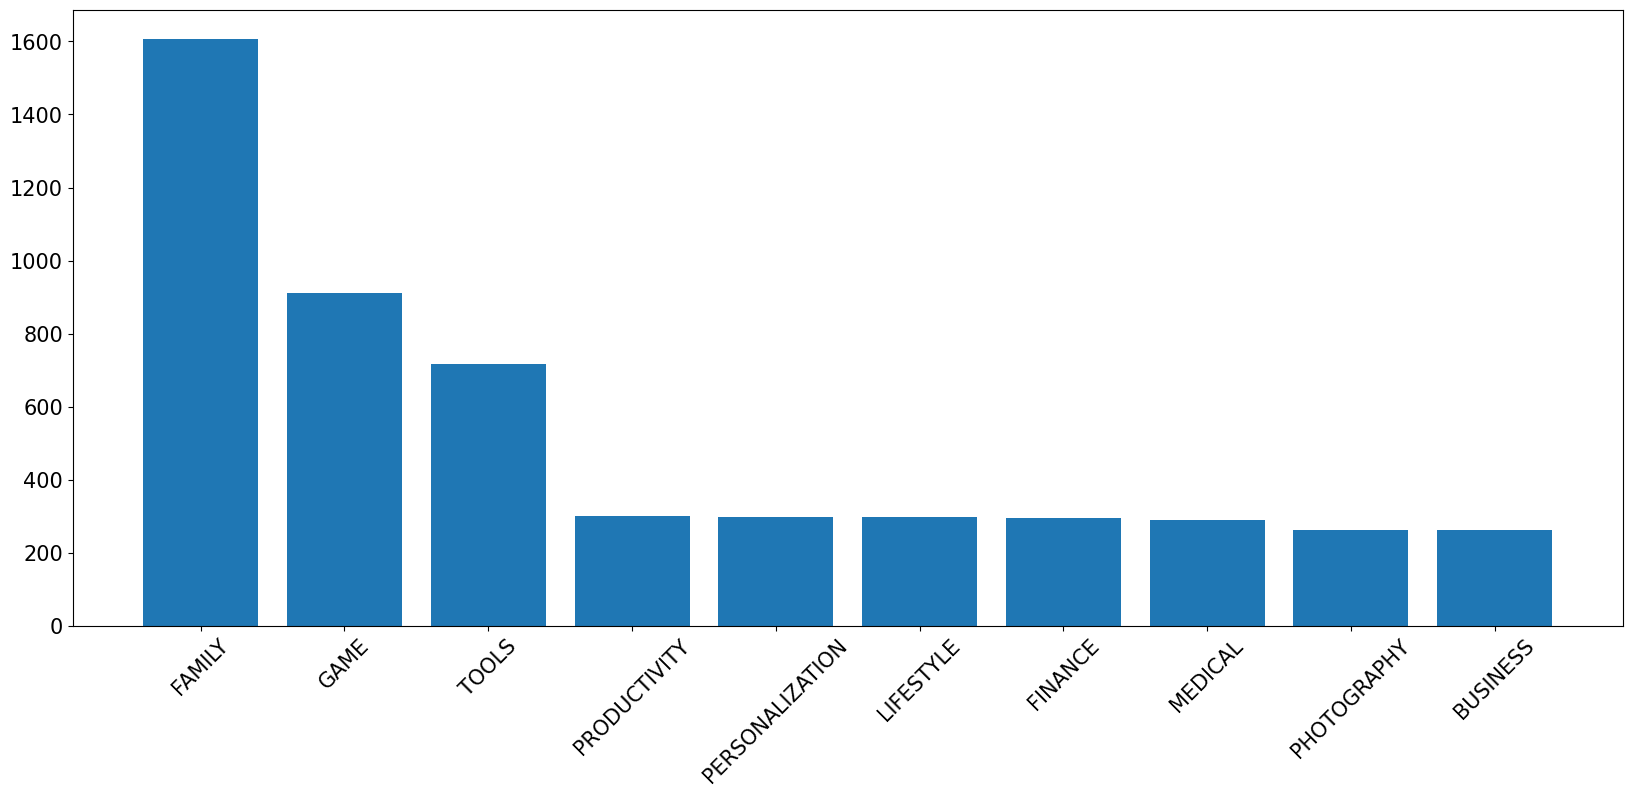

In [456]:
#Bar chart
mpl.figure(figsize=(20,8))
mpl.xticks(fontsize=15, rotation=45)
mpl.yticks(fontsize=15)
mpl.bar(app_cat.index, app_cat.values)
mpl.show()

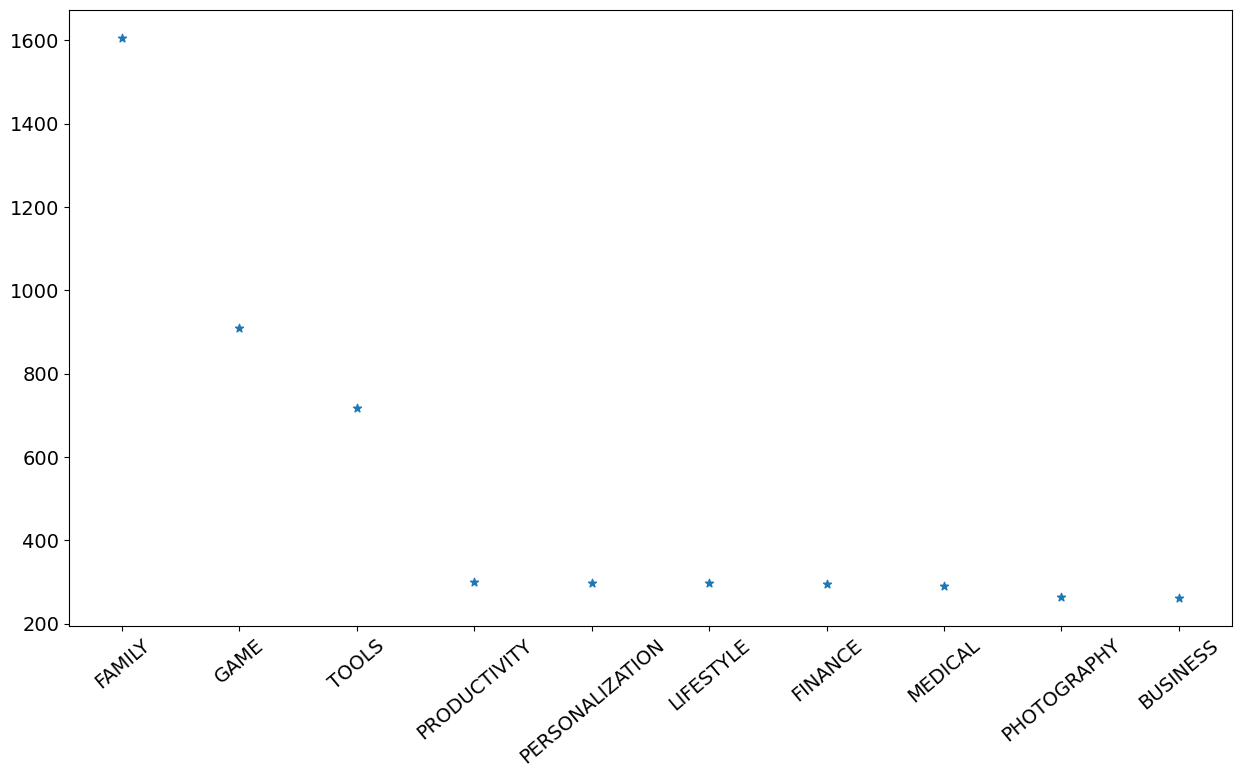

In [406]:
#Scatter points
mpl.figure(figsize=(15,8))
mpl.xticks(fontsize=14, rotation=40)
mpl.yticks(fontsize=14)
mpl.scatter(app_cat.index, app_cat.values, marker="*")

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [452]:
highest_inst= df_apps_clean.groupby("Category").agg({"Installs": pd.Series.sum})

In [453]:
highest_inst= highest_inst.sort_values("Installs", ascending= False)

In [454]:
highest_inst

,Installs
Category,
GAME,13858762717
COMMUNICATION,11039241530
TOOLS,7999724500
PRODUCTIVITY,5788070180
SOCIAL,5487841475
PHOTOGRAPHY,4649143130
FAMILY,4437554490
VIDEO_PLAYERS,3916897200
TRAVEL_AND_LOCAL,2894859300


In [439]:
Hbar= pex.bar(y= highest_inst.index, x= highest_inst.Installs, title="Popular Category",orientation='h')

In [440]:
Hbar.update_layout(xaxis_title="Downloads", yaxis_title="Categories")
Hbar.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [447]:
vbar= pex.bar(x= highest_inst.index, y= highest_inst.Installs, title="Popular Category")
vbar.update_layout(xaxis_title="Categories", yaxis_title="Downloads")

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [480]:
app_category = df_apps_clean.Category.value_counts()

In [478]:
app_category.columns= ["x","y"]

In [485]:
# app_category.to_csv("asdf.csv")
app_category= pd.read_csv("asdf.csv")

In [499]:
# app_category

In [458]:
highest_installs = df_apps_clean.groupby("Category").agg({"Installs": pd.Series.sum})

In [498]:
# highest_installs

In [489]:
merged_df= pd.merge(app_category, highest_installs, on="Category" )

In [491]:
merged_df= merged_df.sort_values("Installs", ascending= False)

In [510]:
# merged_df

In [516]:
schart= pex.scatter(merged_df,x="Count",y="Installs", title="Catogory Concentration", size="Count", hover_name=merged_df.Category, color="Installs")
schart.update_layout(xaxis_title="Number of apps per category", yaxis_title="Number of Installs per App")
schart.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [523]:
df_apps_clean["Genres"].value_counts()

Tools                                717
Entertainment                        467
Education                            429
Productivity                         301
Personalization                      298
                                    ... 
Adventure;Brain Games                  1
Travel & Local;Action & Adventure      1
Art & Design;Pretend Play              1
Music & Audio;Music & Video            1
Lifestyle;Pretend Play                 1
Name: Genres, Length: 114, dtype: int64

In [529]:
genres= df_apps_clean["Genres"].str.split(";", expand=True).stack()

In [556]:
genres_count= genres.value_counts().head(15)

In [562]:
vbar= pex.bar(x= genres_count.index, y= genres_count.values, title="Top Genres", color=genres_count.values, color_continuous_scale="Agsunset")
vbar.update_layout(yaxis_title="Number of apps", xaxis_title="Genres", coloraxis_showscale=False)
vbar.show()

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [586]:
vbar= pex.bar(x= genres_count.index, y= genres_count.values, title="Top Genres", color=genres_count.values, color_continuous_scale="Blackbody")
vbar.update_layout(yaxis_title="Number of apps", xaxis_title="Genres", coloraxis_showscale=False)
vbar.show()

In [587]:
vbar= pex.bar(x= genres_count.index, y= genres_count.values, title="Top Genres", color=genres_count.values, color_continuous_scale="Viridis")
vbar.update_layout(yaxis_title="Number of apps", xaxis_title="Genres", coloraxis_showscale=False)
vbar.show()

In [588]:
vbar= pex.bar(x= genres_count.index, y= genres_count.values, title="Top Genres", color=genres_count.values, color_continuous_scale="Plotly3")
vbar.update_layout(yaxis_title="Number of apps", xaxis_title="Genres", coloraxis_showscale=False)
vbar.show()

In [591]:
vbar= pex.bar(x= genres_count.index, y= genres_count.values, title="Top Genres", color=genres_count.values, color_continuous_scale="Turbo")
vbar.update_layout(yaxis_title="Number of apps", xaxis_title="Genres", coloraxis_showscale=False)
vbar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [601]:
df_Free_vs_Paid= df_apps_clean.groupby(["Category", "Type"], as_index= False).agg({"App":pd.Series.count})

In [602]:
df_Free_vs_Paid=df_Free_vs_Paid.sort_values("App", ascending=False)

In [604]:
df_Free_vs_Paid

,Category,Type,App
19,FAMILY,Free,1456
25,GAME,Free,834
53,TOOLS,Free,655
21,FINANCE,Free,289
31,LIFESTYLE,Free,284
...,...,...,...
17,ENTERTAINMENT,Paid,2
24,FOOD_AND_DRINK,Paid,2
40,PARENTING,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2


In [615]:
d_bar= pex.bar(df_Free_vs_Paid, x="Category", y="App",color="Type", title="Free vs Paid App Category",  barmode="group", )

d_bar.update_layout(xaxis_title="Category", yaxis_title="Number of Apps", yaxis=dict(type='log'))

# d_bar.update_layout(xaxis_title='Category',
#                     yaxis_title='Number of Apps',
#                     yaxis=dict(type='log'))


d_bar.show()

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [626]:
box= pex.box(df_apps_clean,x="Type", y="Installs", color="Type", points="all", notched=True)

box.update_layout(yaxis=dict(type="log"))

box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [638]:
df_paid= df_apps_clean[df_apps_clean["Type"]=="Paid"]

In [642]:
# df_paid

In [654]:
box= pex.box(df_paid, x="Category", y="Revenue_Estimate", title="Paid apps and their revenue")
box.update_layout(yaxis=(dict(type="log")), yaxis_title="Paid App Ballpark Revenue", xaxis={"categoryorder":"min ascending"})
box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [655]:
df_price= df_apps_clean[df_apps_clean["Type"]=="Paid"]

In [660]:
box= pex.box(df_price, x="Category", y="Price", title= "paid apps and paid prices")
box.update_layout(yaxis=(dict(type="log")), yaxis_title="Prices of the apps", xaxis={'categoryorder':'max descending'})
box.show()                                                                                     

In [661]:
# df_price